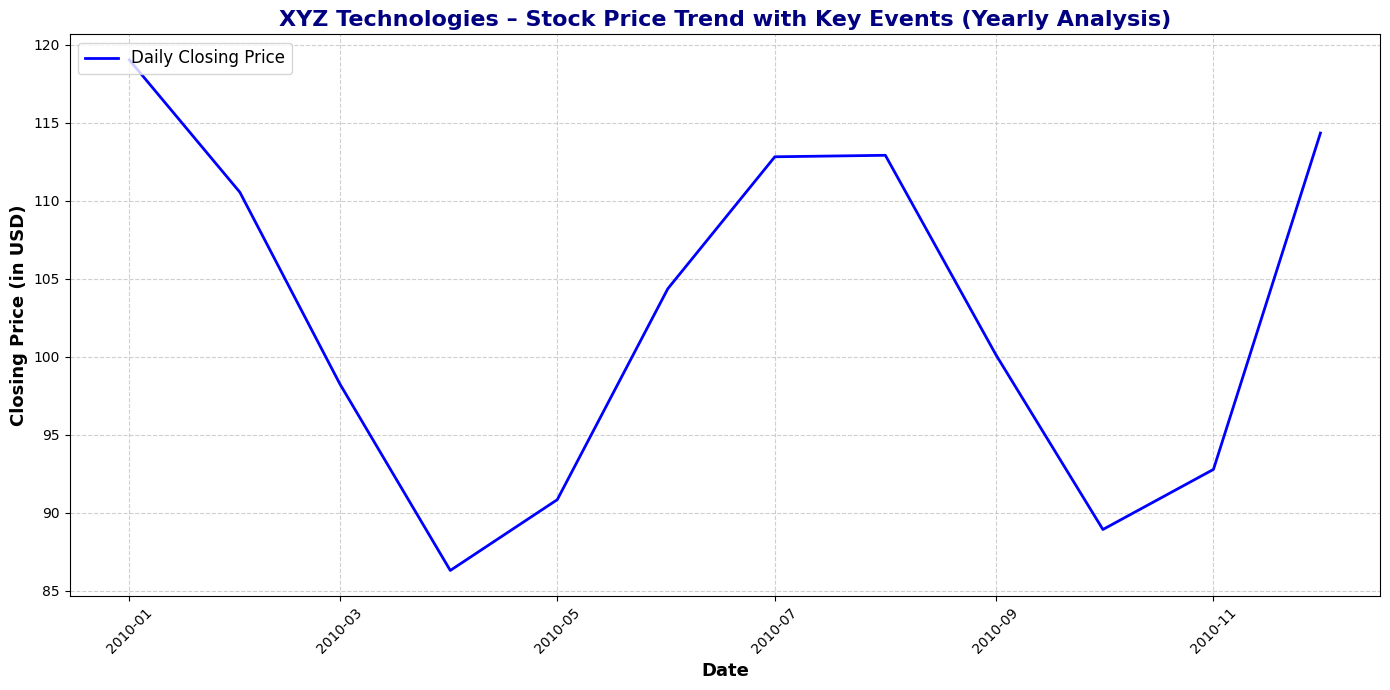

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Electric_Production.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df.rename(columns={'IPG2211A2N': 'Close'}, inplace=True)
df = df.sort_values(by='DATE')

# Filter for a specific year (e.g., 2010 as in your event list)
df_year = df[df['DATE'].dt.year == 2010]

# Define key events
events = {
    "2010-02-10": "New CEO Appointed",
    "2010-04-20": "Q1 Earnings",
    "2010-05-15": "Global Partnership",
    "2010-07-20": "Q2 Earnings",
    "2010-10-20": "Q3 Earnings",
    "2010-11-10": "Regulatory Fine"
}

# Plot stock prices
plt.figure(figsize=(14, 7))
plt.plot(df_year['DATE'], df_year['Close'], label="Daily Closing Price",
         color="blue", linewidth=2)

# Annotate key events with highlighted markers
for date, label in events.items():
    event_date = pd.to_datetime(date)
    price = df_year.loc[df_year['DATE'] == event_date, 'Close']
    if not price.empty:
        plt.scatter(event_date, price.values[0], color="red",
                    s=120, edgecolor="black", zorder=5, marker="o")
        plt.text(event_date, price.values[0] + 2, label, fontsize=10,
                 ha='center', va='bottom', color="darkred", weight="bold", rotation=15)

# Formatting for professional presentation
plt.title("XYZ Technologies – Stock Price Trend with Key Events (Yearly Analysis)",
          fontsize=16, weight="bold", color="navy")
plt.xlabel("Date", fontsize=13, weight="bold")
plt.ylabel("Closing Price (in USD)", fontsize=13, weight="bold")

plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12, loc="upper left")
plt.tight_layout()
plt.show()